## Predictive Model using Polynomial Linear Regression & pipeline with a Decision Tree Regressor on Fish weight 

### Intoduction & Problem Framing

In this work, I'm utilizing the Python-based JupyterLite environment to build a machine-learning model that predicts fish weight based on body measuring data from seven different fish species. This dataset, which includes sales data for seven common fish species from several fish markets, was obtained from Kaggle.com (https://www.kaggle.com/datasets/aungpyaeap/fish-market). I'm planning to combine the Sklearn library's Linear model with the Polynomial feature. It is a polynomial multiple linear regression problem because there are numerous characteristics.Also, I use the Pipeline Decision Tree model to compare at the last which model has the best performance.

### Objectives

- Aquire a dataset from kaggle.
- perform data preprocessing.
- perform visualizations.
- perform machine learning models.
- perform evaluate for their performance.

#### Atrributes documentation

1- (Species): species name of fish.

2- (Weight): weight of fish in Gram (g).

3- (Length1): vertical length in (cm).

4- (Length2): diagonal length in (cm).

5- (Length3): cross length in (cm).

6- (Height): height in (cm).

7- (Width): diagonal width in (cm).

### Install Library Package

In [1]:
%pip install seaborn

### Import The Required Files

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures 

### Files Documentation

- numpy : It is used for working with arrays and matrices.

- pandas: Used for data manipulation and analysis.

- matplotlib : It’s plotting library, and we are going to use it for data visualization.

- seaborn : It is also data visualization library, based on matplotlib.

- linear_model: Sklearn linear regression model.

- train_test_split : helper function from Sklearn library for splitting the dataset.

- sklearn.metrics : Library encapsulate functions to measure the model performance.

- PolynomialFeatures : This used to generate polynomial features. In this study we are going to generate second degree features.

### Load the Fish Data set

In [3]:
df = pd.read_csv('Fish.csv')

### Display the first six rows of the DataFrame

In [4]:
print(df.head(6))

  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
5   Bream   450.0     26.8     29.7     34.7  13.6024  4.9274


### Display the number of rows and columns in the DataFrame

In [5]:
rows, columns = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 159
Number of columns: 7


- Here are total 159 rows(training samples) and 7 columns in Fish dataset.

###  Display the column names of the DataFrame

In [6]:
column_names = df.columns
print(column_names)

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')


### Check the structure of the DataFrame

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.1+ KB


- There are no missing values, so we are good.

### Understand The Data

- (Features/input values/independent variables) are:
    'Species', 'Length1','Length2', 'Length3', 'Height' and 'Width'
    
- (Target/output value/dependent variable) is:
    'Weight'
    
So, we have to estimate the weight of the fish based on its measurement values.

### I will change the name of columns length 1, length 2, and length 3 as per the content of it.

#### Define a dictionary to map the new column namesnt of it

In [8]:
new_column_names = {
    'Length1': 'VerticalLen',
    'Length2': 'DiagonalLen',
    'Length3': 'CrossLen'
}

#### Rename the columns using the dictionary

In [9]:
df.rename(columns=new_column_names, inplace=True)

#### Display the updated DataFrame with the new column names

In [10]:
print(df.head())

  Species  Weight  VerticalLen  DiagonalLen  CrossLen   Height   Width
0   Bream   242.0         23.2         25.4      30.0  11.5200  4.0200
1   Bream   290.0         24.0         26.3      31.2  12.4800  4.3056
2   Bream   340.0         23.9         26.5      31.1  12.3778  4.6961
3   Bream   363.0         26.3         29.0      33.5  12.7300  4.4555
4   Bream   430.0         26.5         29.0      34.0  12.4440  5.1340


### Data Analysis Cleaning and Visualization

* Correlation Check
    
    - Correlation helps us investigate and establish relationships between variables.
    - Be aware that the high degree of correlation between the independent variables hints at the unreliability of the linear regression estimation.


#### Calculate the correlation matrix

In [11]:
correlation_matrix = df.corr()

<ipython-input-11-68bbfff3c4eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


#### Display the correlation matrix

In [12]:
print(correlation_matrix)

               Weight  VerticalLen  DiagonalLen  CrossLen    Height     Width
Weight       1.000000     0.915712     0.918618  0.923044  0.724345  0.886507
VerticalLen  0.915712     1.000000     0.999517  0.992031  0.625378  0.867050
DiagonalLen  0.918618     0.999517     1.000000  0.994103  0.640441  0.873547
CrossLen     0.923044     0.992031     0.994103  1.000000  0.703409  0.878520
Height       0.724345     0.625378     0.640441  0.703409  1.000000  0.792881
Width        0.886507     0.867050     0.873547  0.878520  0.792881  1.000000


* Note:
    - the value 0.915712 in row 'Weight' and column 'VerticalLen' indicates a strong positive correlation between the 'Weight' and 'VerticalLen' columns. Similarly, the value 0.792881 in row 'Height' and column 'Width' indicates a moderately positive correlation between the 'Height' and 'Width' columns.

### I create a heatmap of the correlation matrix for the DataFrame "df"

#### Set custom figure size

In [13]:
plt.rcParams["figure.figsize"] = (10, 6)

#### Calculate the correlation matrix

In [14]:
correlation_matrix = df.corr()

<ipython-input-14-68bbfff3c4eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


#### I Create the correlation heatmap using seaborn

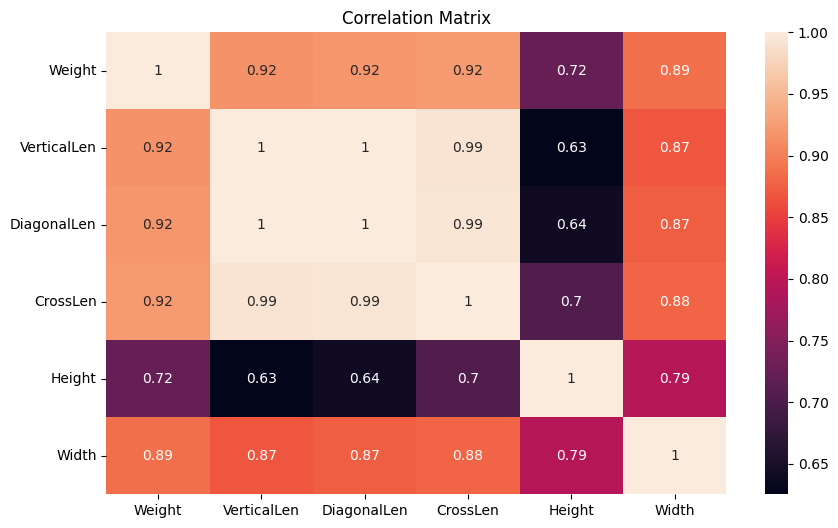

In [15]:
# I create a heatmap using seaborn's heatmap function

sns.heatmap(correlation_matrix, annot=True)# is used to display the correlation coefficients on the heatmap.

plt.title('Correlation Matrix') # title for the heatmap
plt.show()

### understanding Correlation Matrix

- Correlation coefficient range from (-1 to +1).
- Sign(+/-) indicate the direction and amount indicate the strength of correlation.
- (+1.00) means perfect positive relationship.
- (0.00) means no relationship.
- (1.00) means perfect negative relationship.

* Note:
- VerticalLen, DiagonalLen, and CrossLen almost have a (1) correlation. 'Multicollinearity' could result from this.

#### Since of that understanding, I will drop the 'VerticalLen', 'DiagonalLen' and 'Crosslen' column.

#### I create the new DataFrame 'df1'

In [16]:
df1 = df.drop(['VerticalLen', 'DiagonalLen', 'CrossLen'], axis=1)

#### Print the new dimension of the dataset

In [17]:
print('New dimension of dataset is =', df1.shape)

New dimension of dataset is = (159, 4)


#### Display the first three rows of the updated DataFrame 'df1'

In [18]:
print(df1.head(3))

  Species  Weight   Height   Width
0   Bream   242.0  11.5200  4.0200
1   Bream   290.0  12.4800  4.3056
2   Bream   340.0  12.3778  4.6961


### Visualization

#### I Create a pair plot with scatter plots for each pair of numeric variables and I used the 'Species' column to color the data point

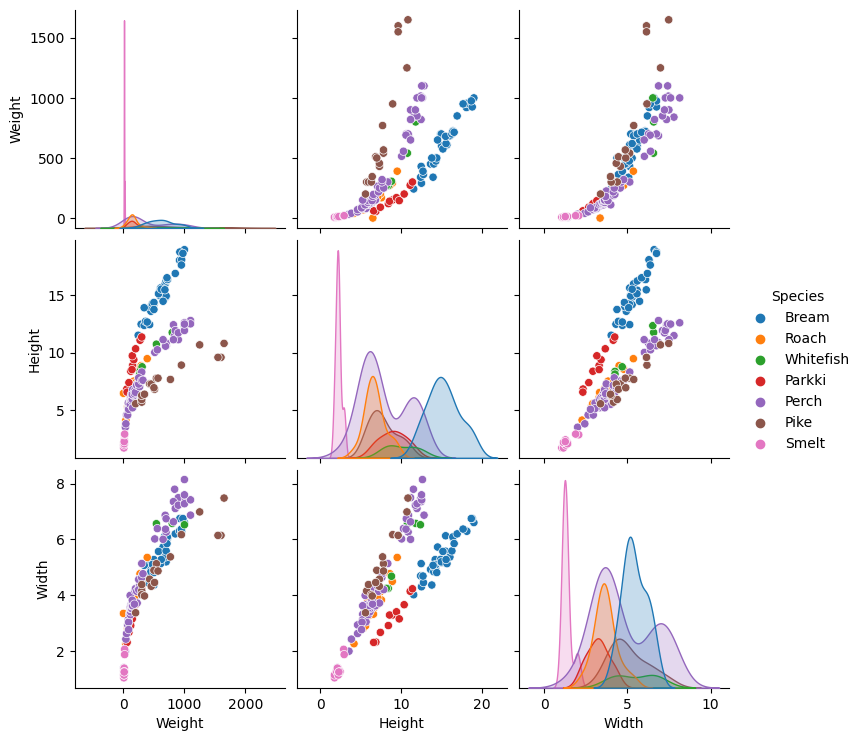

In [19]:
sns.pairplot(df1, kind='scatter', hue='Species')# I use seaborn's pairplot function to create a scatter plot matrix
plt.show()

* Observation:
    - Height, width, and weight appear to be correlated to some extent, as seen by the pair plot above. The correlation between Height and Width of all species is not perfectly linear with Weight because there are various species in our species. 

### Since the final dataset is prepared, let's assess it and, if necessary, delete any outliers.

#### Outlier Detection and Removal

#### I create a function for outlier detection that can handle a DataFrame with multiple columns

In [20]:
def outlier_detection(dataframe):
    
    # calculate the Interquartile Range (IQR)
    
    Q1 = dataframe.quantile(0.25)
    Q3 = dataframe.quantile(0.75)
    IQR = Q3 - Q1
    
    #  calculate the upper and lower bounds for potential outliers
    
    upper_end = Q3 + 1.5 * IQR
    lower_end = Q1 - 1.5 * IQR 
    outlier = dataframe[(dataframe > upper_end) | (dataframe < lower_end)]
    
    return outlier 

* Note:
    - It does not necessarily mean that all detected points are true outliers. Outliers may require further field investigation to determine if they are false data points or represent true anomalies.

#### I Find the outliers for every feature column


#### Outlier detection based on 'Weight' , and I plot it using box plot

Text(0.5, 1.0, 'Outlier Detection Based on Weight')

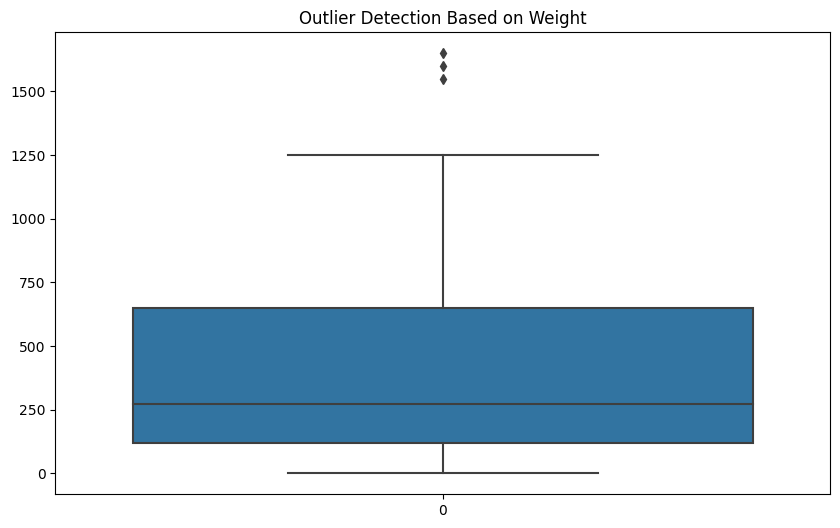

In [21]:
sns.boxplot(data= df1['Weight'] )
plt.title('Outlier Detection Based on Weight')

#### The 'Species' column contains categorical values, so I use (list slicing) to iterate over all the columns except the first one

In [22]:
# iterates through each numerical column (excluding the first column, which is 'Species' column)
# in the DataFrame df1 and then uses the outlier_detection() function to detect and print potential
# outliers for each column. 

for column in df1.columns[1:]:
    print('\nOutliers in column "%s" ' % column)
    outlier = outlier_detection(df1[column])
    print(outlier)


Outliers in column "Weight" 
142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

Outliers in column "Height" 
Series([], Name: Height, dtype: float64)

Outliers in column "Width" 
Series([], Name: Width, dtype: float64)


* observation:
    - For features Weight, VerticalLen, and DiagonalLen index numbers [142], [143], and [144] are the outliers. For features Height and Width there are no outliers.

* Note:
    - Though we have a small dataset, species-wise outlier detection will help to make our model more accurate.

## find the outlier for each species

In [23]:
# I create temp dataframe without 'Weight' for plotting the boxplot:

df_temp = df1.drop(['Weight'], axis='columns')

### Outlier detection for Perch species

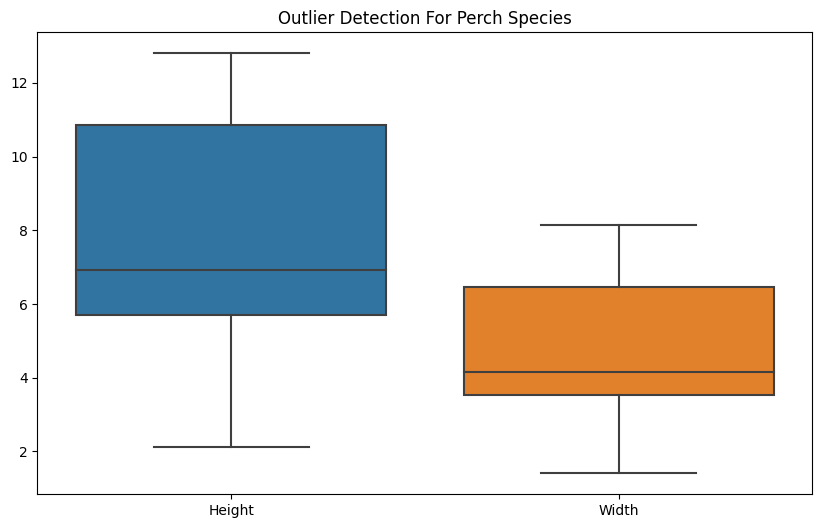

In [24]:
sns.boxplot(data=df_temp[df_temp['Species'] == 'Perch'])
plt.title('Outlier Detection For Perch Species')

# Show the plot

plt.show()

####  I create a new DataFrame "df_Perch" that contains only the data for the 'Perch' species from the original DataFrame df1

In [25]:
df_Perch = df1[df1.Species == 'Perch']

# Loop through each numeric column in "df_Perch"

for column in df_Perch.columns[1:]:
    print('\nOutliers in column "%s" ' % column)
    outlier = outlier_detection(df_Perch[column])
    print(outlier)


Outliers in column "Weight" 
Series([], Name: Weight, dtype: float64)

Outliers in column "Height" 
Series([], Name: Height, dtype: float64)

Outliers in column "Width" 
Series([], Name: Width, dtype: float64)


* Observation:
    - There are no outliers for 'Perch' fish species

### Outlier detection for Roach species

Text(0.5, 1.0, 'Outlier Detection For Roach Species')

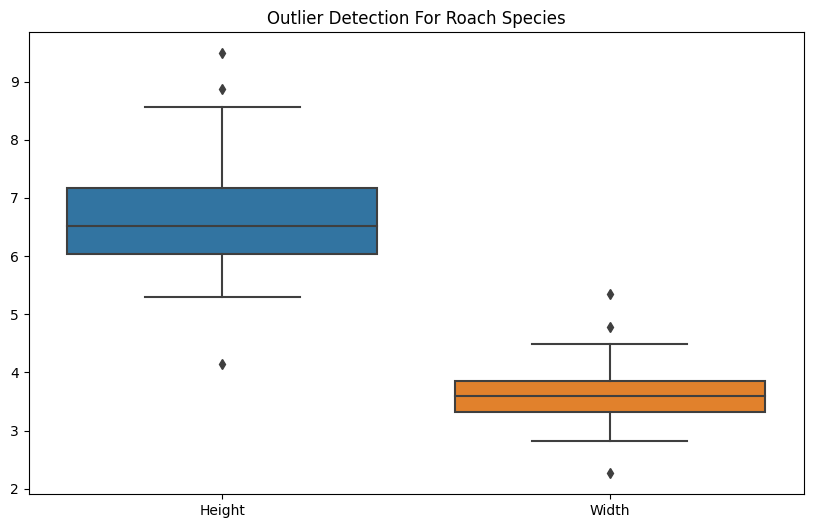

In [26]:
sns.boxplot(data= df_temp[df_temp.Species == 'Roach'] )
plt.title('Outlier Detection For Roach Species')

In [27]:
df_Roach = df1[df1.Species == 'Roach']

for column in df_Roach.columns[1:]: 
    print('\nOutliers in column "%s" ' % column)
    outlier = outlier_detection(df_Roach[column])
    print(outlier)


Outliers in column "Weight" 
40      0.0
52    290.0
54    390.0
Name: Weight, dtype: float64

Outliers in column "Height" 
35    4.1472
52    8.8768
54    9.4850
Name: Height, dtype: float64

Outliers in column "Width" 
35    2.2680
53    4.7736
54    5.3550
Name: Width, dtype: float64


* Observation:
    - I can see only row 54 and 35 are common across the majority of features, so I can remove them.

### Outlier detection for Pike species

Text(0.5, 1.0, 'Outlier Detection For Pike Species')

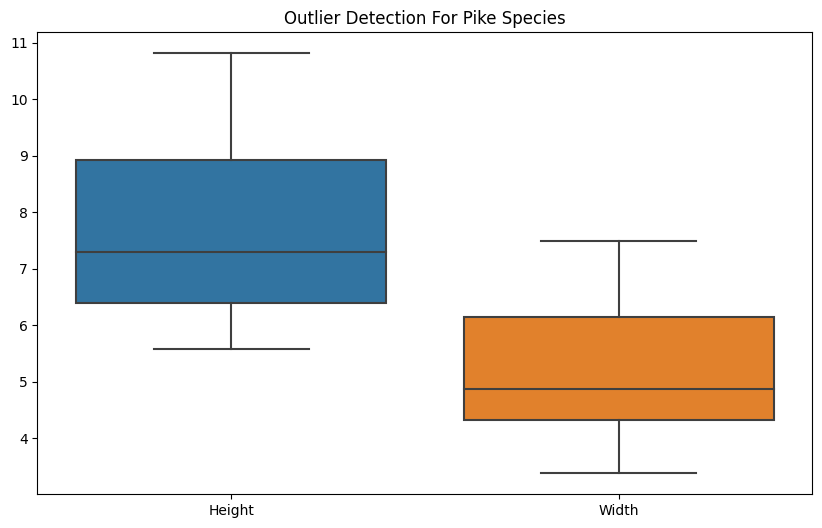

In [28]:
sns.boxplot(data= df_temp[df_temp.Species == 'Pike'] )
plt.title('Outlier Detection For Pike Species')

In [29]:
df_Pike = df1[df1.Species == 'Pike']

for column in df_Pike.columns[1:]: 
    print('\nOutliers in column "%s" ' % column)
    outlier = outlier_detection(df_Pike[column])
    print(outlier)


Outliers in column "Weight" 
Series([], Name: Weight, dtype: float64)

Outliers in column "Height" 
Series([], Name: Height, dtype: float64)

Outliers in column "Width" 
Series([], Name: Width, dtype: float64)


* Observation:
    - There is no outlier for Pike species

### Outlier detection for Smelt species

Text(0.5, 1.0, 'Outlier Detection For Smelt Species')

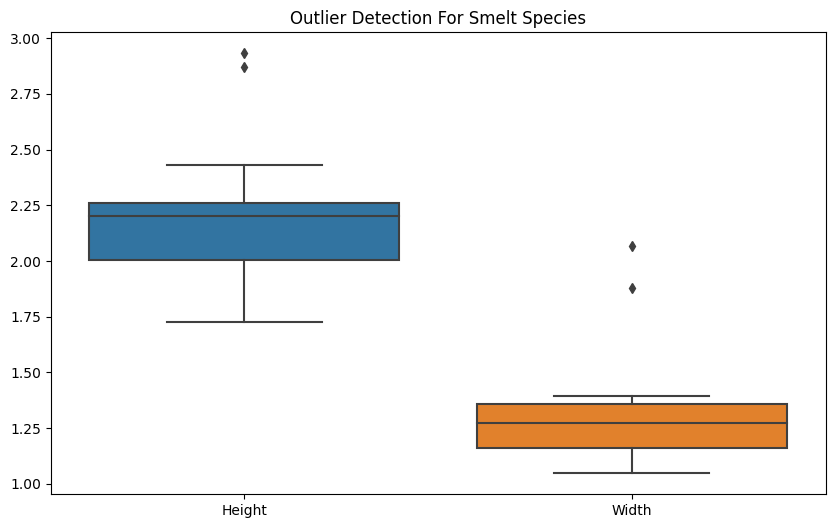

In [30]:
sns.boxplot(data= df_temp[df_temp.Species == 'Smelt'] )
plt.title('Outlier Detection For Smelt Species')

In [31]:
df_Smelt = df1[df1.Species == 'Smelt']

for column in df_Smelt.columns[1:]: 
    print('\nOutliers in column "%s" ' % column)
    outlier = outlier_detection(df_Smelt[column])
    print(outlier)


Outliers in column "Weight" 
157    19.7
158    19.9
Name: Weight, dtype: float64

Outliers in column "Height" 
157    2.8728
158    2.9322
Name: Height, dtype: float64

Outliers in column "Width" 
157    2.0672
158    1.8792
Name: Width, dtype: float64


* observation:
    - I can see only rows 157 and 158 are common across multiple features, so I can remove them

### Outlier detection for Parkki species

Text(0.5, 1.0, 'Outlier Detection For Parkki Species')

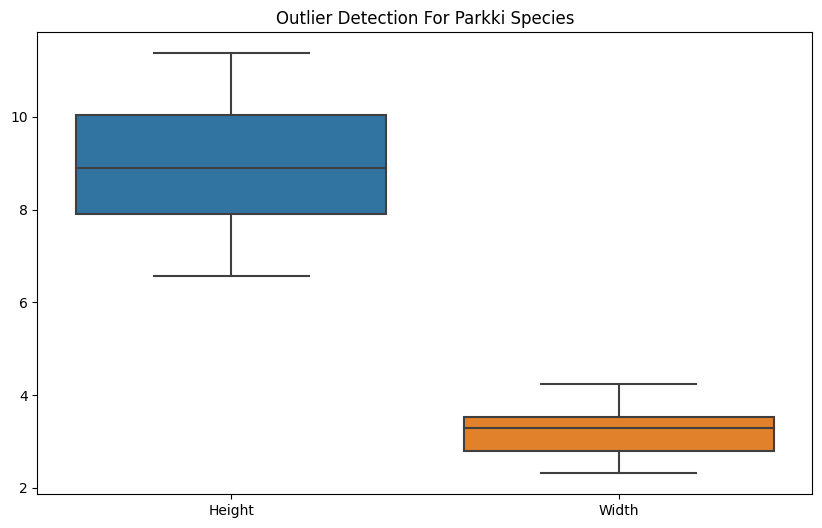

In [32]:
sns.boxplot(data= df_temp[df_temp.Species == 'Parkki'] )
plt.title('Outlier Detection For Parkki Species')

In [33]:
df_Parkki = df1[df1.Species == 'Parkki']

for column in df_Parkki.columns[1:]: 
    print('\nOutliers in column "%s" ' % column)
    outlier = outlier_detection(df_Parkki[column])
    print(outlier)


Outliers in column "Weight" 
Series([], Name: Weight, dtype: float64)

Outliers in column "Height" 
Series([], Name: Height, dtype: float64)

Outliers in column "Width" 
Series([], Name: Width, dtype: float64)


* Observation:
    - There is no outliers for Parkki species

### Outlier detection for Whitefish species

Text(0.5, 1.0, 'Outlier Detection For Whitefish Species')

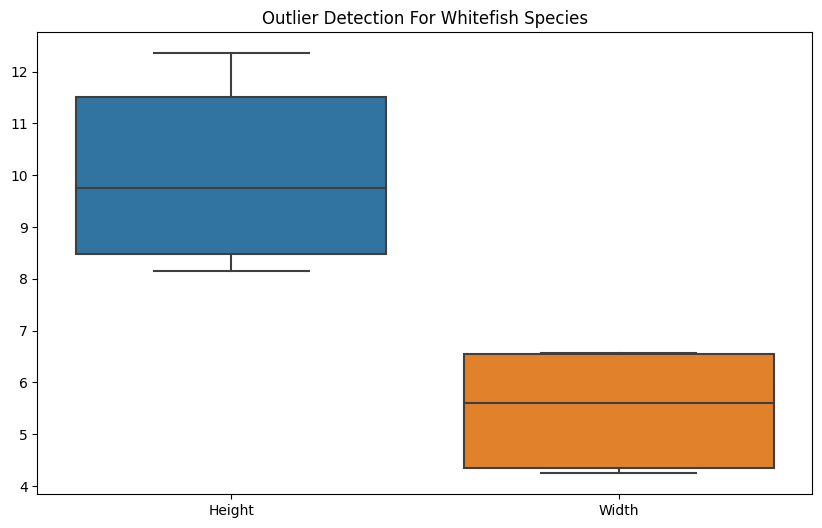

In [34]:
sns.boxplot(data= df_temp[df_temp.Species == 'Whitefish'] )
plt.title('Outlier Detection For Whitefish Species')

In [35]:
df_Whitefish = df1[df1.Species == 'Whitefish']

for column in df_Whitefish.columns[1:]: 
    print('\nOutliers in column "%s" ' % column)
    outlier = outlier_detection(df_Whitefish[column])
    print(outlier)


Outliers in column "Weight" 
Series([], Name: Weight, dtype: float64)

Outliers in column "Height" 
Series([], Name: Height, dtype: float64)

Outliers in column "Width" 
Series([], Name: Width, dtype: float64)


* Observation:
    - There is no outliers for Whitefish species

### Dropping the outlier rows (drop the species-specific outliers only)

In [36]:
df2 = df1.drop([35, 54, 157, 158])

print(df2.shape)

(155, 4)


### Check for null values

In [37]:
# Check for null values in df2

null_values = df2.isnull()

# Sum the null values for each column:

null_counts = null_values.sum()

# Display the number of null values for each column:

print("Number of null values for each column:")
print(null_counts)

Number of null values for each column:
Species    0
Weight     0
Height     0
Width      0
dtype: int64


### By using Domain Knowledge For Data Cleaning

## Task1:

### find and remove the training data where the weight of the fish is 0 or negative

In [38]:
df2[df2.Weight <= 0]

,Species,Weight,Height,Width
40,Roach,0.0,6.4752,3.3516


In [39]:
df3 = df2.drop([40])
df3.shape

(154, 4)

* Note:
    - Since Species is a categorical value, we are going to use One Hot Encoding to convert it into numerical format

### One Hot Encoding

In [40]:
# I Create dummy variables for the 'Species' column
# (dummy) is binary variables that represent the categories in the categorical column

dummies_species = pd.get_dummies(df3['Species'])

# Display the first 3 rows of the 'dummies_species' Df:

print(dummies_species.head(3))

   Bream  Parkki  Perch  Pike  Roach  Smelt  Whitefish
0      1       0      0     0      0      0          0
1      1       0      0     0      0      0          0
2      1       0      0     0      0      0          0


In [41]:
# Concatenate df3 and dummies_species along the columns (axis=1)

df4 = pd.concat([df3, dummies_species], axis= 'columns')

# Display the new DataFrame

print(df4.head())

  Species  Weight   Height   Width  Bream  Parkki  Perch  Pike  Roach  Smelt  \
0   Bream   242.0  11.5200  4.0200      1       0      0     0      0      0   
1   Bream   290.0  12.4800  4.3056      1       0      0     0      0      0   
2   Bream   340.0  12.3778  4.6961      1       0      0     0      0      0   
3   Bream   363.0  12.7300  4.4555      1       0      0     0      0      0   
4   Bream   430.0  12.4440  5.1340      1       0      0     0      0      0   

   Whitefish  
0          0  
1          0  
2          0  
3          0  
4          0  


#### Since we have dummy variables we can drop the 'Species' column and to dodge the 'Dummy Variable Trap' issue we are going to drop the 'Whitefish' column.

In [42]:
df5 = df4.drop(['Species','Whitefish'], axis = 'columns')
df5.head(3)

,Weight,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt
0,242.0,11.5200,4.0200,1,0,0,0,0,0
1,290.0,12.4800,4.3056,1,0,0,0,0,0
2,340.0,12.3778,4.6961,1,0,0,0,0,0


### Build Machine Learning Model

In [43]:
# Create the feature matrix X with selected columns:

X = df5[['Height', 'Width', 'Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt']]

# Create the label vector y with the 'Weight' column:

y = df5[['Weight']]

In [44]:
# Split the data into training and test sets:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [45]:
# Print the dimensions of the training and test sets:

print('X_train dimension =', X_train.shape)
print('X_test dimension =', X_test.shape)
print('y_train dimension =', y_train.shape)
print('y_test dimension =', y_test.shape)

X_train dimension = (123, 8)
X_test dimension = (31, 8)
y_train dimension = (123, 1)
y_test dimension = (31, 1)


## Visualization Using Polynomial Function

* Note:
    - Since we have multiple species, the relation between features(Height, Width) and Weight is not linear, The line won't be a good fit for the given data and may result in (underfitting).

###  visualize the data using multiple degrees of polynomial

#### numpy functions documentation

* numpy.polyfit: Used to fit a polynomial function of given degrees. It returns the coefficients (which minimizes the squared error) of the polynomial equation:
    - Polynomial equation of degree 1 is linear equation: y = mx + b
    - Polynomial equation of degree 2 is quadratic equation: y = ax^2 + bx + c
    - So polyfit function will return the coefficients of the polynomial equation. For linear equation coeff will be [m,b] and for quadratic equation coeff will be [a,b,c]
    
    
    
* numpy.poly1d: Is used to define the polynomial function using the coefficients returned by 'numpy.polyfit':
    - It takes polynomial coefficients as argument and construct a polynomial.
    
    

* numpy.linspace: Takes three arguments (start, stop and num) and generates evenly spaced values(same as 'num') within 'start' and 'stop' range.



* draw a polynomial function we will plot 'values' generated 'linspace' function on X axis and on Y axis 'poly_func' output for every 'values'.

In [46]:
def polynomial_plot(feature, label):
    
    # Create 1D arrays from the feature and label:
    
    x_coordinates = feature
    y_coordinates = np.squeeze(label) # removing the dimensions with length 1

    # Construct first degree (linear) polynomial function:
    
    linear_func = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 1))

    # Construct second degree (quadratic) polynomial function:
    
    quadratic_func = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 2))

    # Generate evenly spaced values within the range of x_coordinates:
    
    values = np.linspace(x_coordinates.min(), x_coordinates.max(), len(x_coordinates))

    # Plot the original data points:
    
    plt.scatter(x_coordinates, y_coordinates, color='blue')

    # Plot the linear and quadratic curves:
    
    plt.plot(values, linear_func(values), color='cyan', linestyle='dashed', label='Linear Function')
    plt.plot(values, quadratic_func(values), color='red', label='Quadratic Function')

    plt.xlabel('%s From Test Data' % (feature.name))
    plt.ylabel('Weight')
    plt.rcParams["figure.figsize"] = (10, 6)  # Custom figure size in inches
    plt.legend()
    plt.title("Linear Vs Quadratic Function For Feature %s" % (feature.name))
    plt.show()

### plot first and second degree polynomical for feature 'Width'

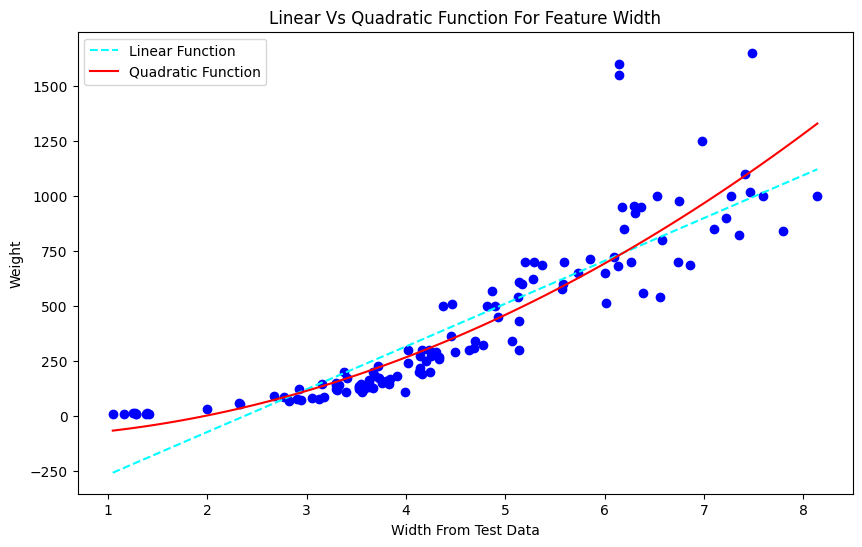

In [47]:
polynomial_plot(X_train.Width, y_train)

### plot first and second degree polynomical for feature 'Height'

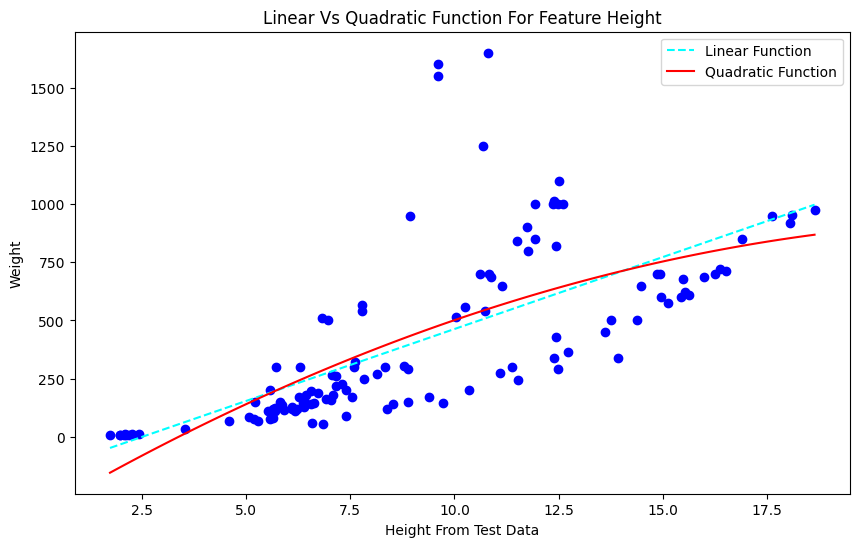

In [48]:
polynomial_plot(X_train.Height, y_train)

* Observation:
    - From the above first and second-degree polynomial plots, it's clear that the second-degree polynomial feature will provide a better fit.

### Polynomial Regression Using Sklearn Library

#### I will use the second-degree polynomial feature, which will give us a quadratic equation to fit the data.

In [49]:
# Creating a PolynomialFeatures object:

poly = PolynomialFeatures(degree=2)

In [50]:
# Transforming the input features to polynomial features:

X_poly = poly.fit_transform(X_train)

##### transform the original input features X_train into a new feature matrix X_poly, which consists of all the polynomial combinations of the features up to the specified degree (degree=2).

In [51]:
# Fitting the transformed features and target values to a regression model:

poly.fit(X_poly, y_train)

PolynomialFeatures()

### Ordinary Least Squares Algorithm

* Note:
    
    - I will use one of the basic linear regression algorithms (Ordinary Least Squares Algorithm) which will train the model.   
    - The goal of the Ordinary Least Square Algorithm is to minimize the residual sum of squares.
    - ('deviation of predicted value(Xw) from the actual value(y)').
    - The size of coefficients increases exponentially with an increase in model complexity

In [52]:
lm = linear_model.LinearRegression() 
lm.fit(X_poly, y_train) # independent variables contains polynomial features of the original input data (X_poly).

LinearRegression()

#### I use the trained linear regression model to make predictions on the test data.

In [53]:
# computes the polynomial features and applies them to the test data

predictions = lm.predict(poly.fit_transform(X_test))

### coefficient of multiple determination

In [54]:
from sklearn.metrics import mean_squared_error

# Calculate the Mean Squared Error (MSE):

mse = mean_squared_error(y_test, predictions)

print('Mean Squared Error (MSE):', mse)

Mean Squared Error (MSE): 4911.6833626596435


In [55]:
# calculates the R-squared (R2) score to evaluate the performance of the linear regression model. 

print('r2_score= ', metrics.r2_score(y_test, predictions))

r2_score=  0.952955517375119


#### new DataFrame called 'predictedWeight' from the predictions obtained using the linear regression model.

In [56]:
predictedWeight = pd.DataFrame(predictions, columns=['Predicted Weight'])

#### New DataFrame called 'actualWeight' from the y_test data, contains the actual target values for the test data.

In [57]:
actualWeight = pd.DataFrame(y_test)

#### removing the previous index

In [58]:
actualWeight = actualWeight.reset_index(drop=True)

#### concatenates the actualWeight and predictedWeight DataFrames along the columns. 

In [59]:
df_actual_vs_predicted = pd.concat([actualWeight,predictedWeight],axis =1)

#### flips the rows and columns

In [60]:
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
Weight,150.000000,725.000000,85.000000,40.000000,270.000000,7.00000,456.000000,475.000000,925.000000,450.000000,...,272.000000,9.900000,430.000000,820.000000,300.000000,120.000000,500.000000,9.800000,51.500000,900.000000
Predicted Weight,175.210712,762.103677,83.489127,30.097908,303.879001,6.33176,620.584831,516.314869,1068.777326,481.642018,...,307.096827,9.911433,611.775667,738.097921,224.940404,135.154069,504.337688,9.587742,52.403626,788.493483


### scatter plot of weight from test data vs predicted weight

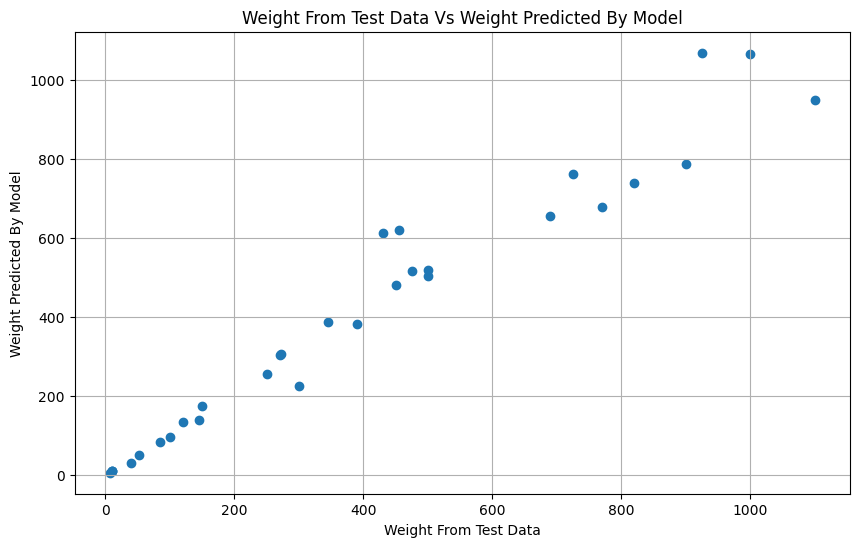

In [61]:
plt.scatter(y_test, predictions)
plt.xlabel('Weight From Test Data')
plt.ylabel('Weight Predicted By Model')
plt.rcParams["figure.figsize"] = (10, 6) 
plt.title("Weight From Test Data Vs Weight Predicted By Model")
plt.grid(True)
plt.show()

### Evaluating the Model

<ipython-input-62-a700f30d425d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


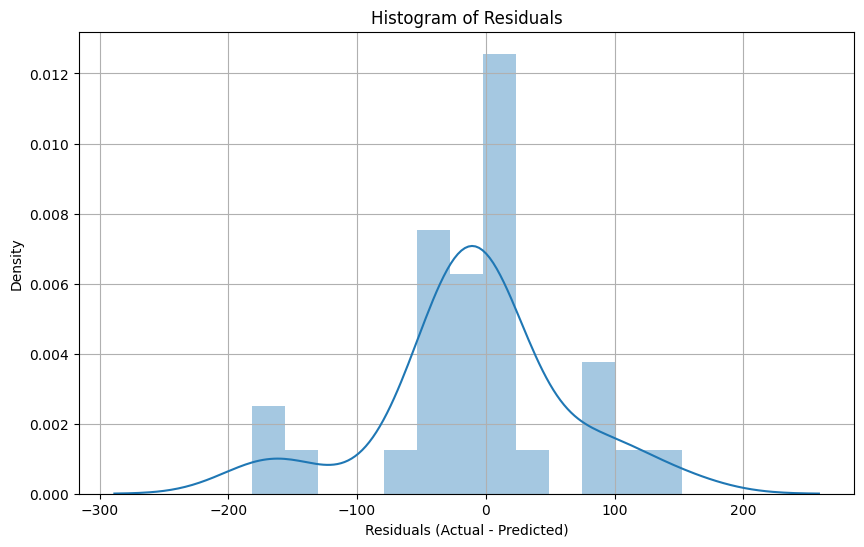

In [62]:
# Calculate the residuals

residuals = y_test - predictions

# Create a histogram of residuals

sns.distplot(residuals)
plt.rcParams["figure.figsize"] = (10, 6)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Density")
plt.grid(True)
plt.show()

* Observation:
    - there are no negative weight values.
    - our model score is over 90%, which is very good.
    - I can see here , finding the outlier based on species and using second-degree polynomial features worked.

### Applying pipeline with a Decision Tree Regressor

#### Load necessary Libraries

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor

#### Intialize the Pipeline for Decision Tree 

In [64]:
# Define the steps of the pipeline

steps = [
    ('scaler', MinMaxScaler()), # Scale the features
    ('classifier', DecisionTreeRegressor()) # Train a Decision Tree classifier
]

# Create the pipeline

pipeline = Pipeline(steps)

#### Fit the pipeline to the training data

In [65]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', DecisionTreeRegressor())])

#### Make predictions on new data (X_test)

In [66]:
predictions = pipeline.predict(X_test)

### Model Evaluation

### Mean Squared Error (MSE) and R-squared (R2)

In [67]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 9728.630645161289
R-squared (R2): 0.906818424243385


### VotingRegressor

In [68]:
from sklearn.ensemble import VotingRegressor

# Create the VotingRegressor:

voting_regressor = VotingRegressor(estimators=[('linear', lm), ('tree', pipeline)])

# Fit the VotingRegressor on the training data:

voting_regressor.fit(X_train, y_train)

# Predict the target values on the test data:

predictions_voting = voting_regressor.predict(X_test)

# Calculate evaluation metrics:

mse_voting = mean_squared_error(y_test, predictions_voting)
r2_voting = r2_score(y_test, predictions_voting)

print("Mean Squared Error (MSE) - Voting Regressor:", mse_voting)
print("R-squared (R2) - Voting Regressor:", r2_voting)

/lib/python3.11/site-packages/sklearn/ensemble/_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error (MSE) - Voting Regressor: 6222.678337876211
R-squared (R2) - Voting Regressor: 0.9403987062415354
